Here are histograms of graph level features. Centralities (that are essentially node features) 

In [ ]:
import dgl
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
pickle_name = 'graph_fv_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)
fv = np.asarray([fv for fv, _ in  dataset])
labels = np.asarray([l for _,l in dataset])

normal_fv = fv[labels==0]
prop_fv = fv[labels==1]
features = ['mean closeness centrality', 'mean in degree centrality', 'mean out degree centrality', 'mean betweenness centrality', 'mean eigenvector centrality', 'mean clustering coefficient', 'graph transitivity', 'graph radius', 'links by title / url ratio', '# nodes', '# edges']

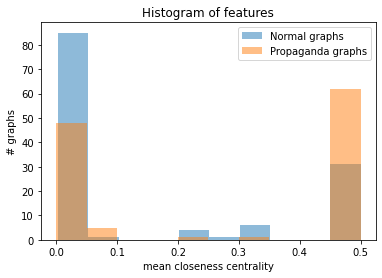

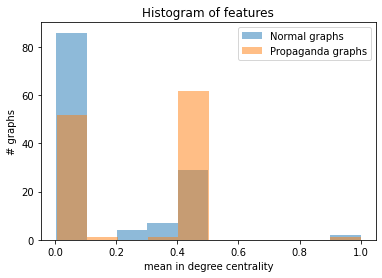

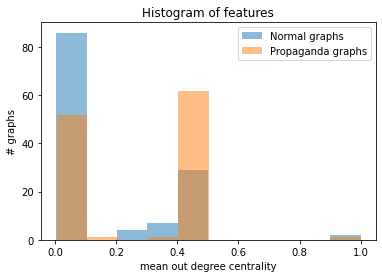

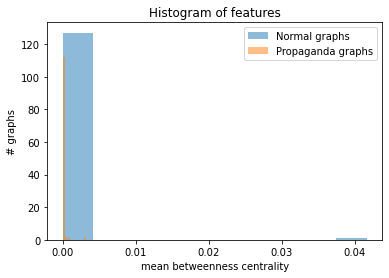

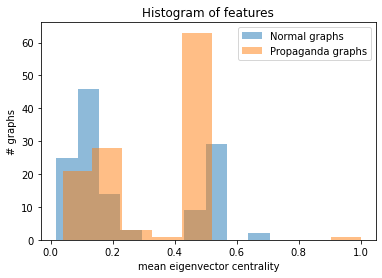

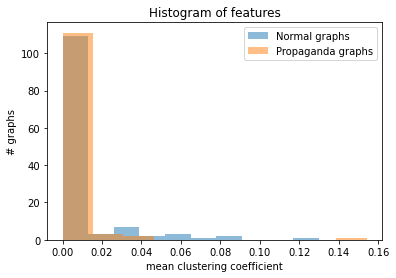

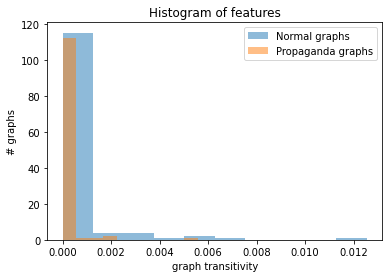

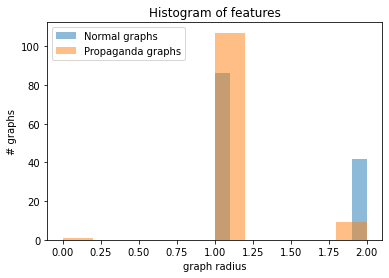

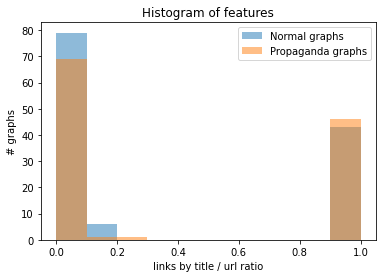

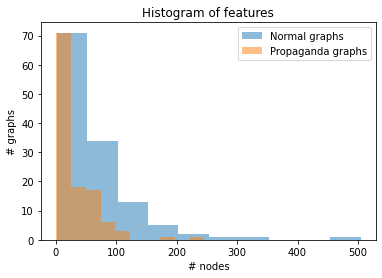

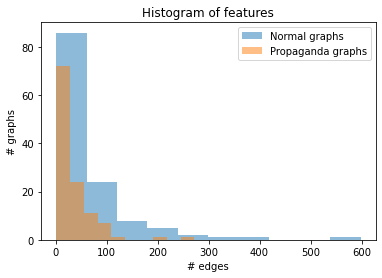

In [3]:
for feature_id in range(fv.shape[1]):
    plt.figure()
    plt.title('Histogram of features')
    plt.ylabel('# graphs')
    plt.xlabel(features[feature_id])
    plt.hist(normal_fv[:, feature_id], label='Normal graphs', alpha=0.5)
    plt.hist(prop_fv[:, feature_id], label='Propaganda graphs', alpha=0.5) 
    plt.legend()
    plt.show()

In [4]:
print(*zip(range(len(features)), features), sep='\n')
np.set_printoptions(precision=2, linewidth=150)
print(*np.cov(fv.T), sep='\n')

(0, 'mean closeness centrality')
(1, 'mean in degree centrality')
(2, 'mean out degree centrality')
(3, 'mean betweenness centrality')
(4, 'mean eigenvector centrality')
(5, 'mean clustering coefficient')
(6, 'graph transitivity')
(7, 'graph radius')
(8, 'links by title / url ratio')
(9, '# nodes')
(10, '# edges')
[ 5.28e-02  5.32e-02  5.32e-02 -9.74e-07  4.17e-02 -1.10e-03 -6.42e-05 -3.98e-02  8.63e-02 -8.44e+00 -9.11e+00]
[ 5.32e-02  5.97e-02  5.97e-02 -8.17e-06  4.64e-02 -1.16e-03 -6.82e-05 -4.63e-02  9.18e-02 -8.83e+00 -9.52e+00]
[ 5.32e-02  5.97e-02  5.97e-02 -8.17e-06  4.64e-02 -1.16e-03 -6.82e-05 -4.63e-02  9.18e-02 -8.83e+00 -9.52e+00]
[-9.74e-07 -8.17e-06 -8.17e-06  7.16e-06 -1.49e-05 -3.72e-07 -8.94e-09  1.82e-04  8.91e-05 -6.34e-03 -6.76e-03]
[ 4.17e-02  4.64e-02  4.64e-02 -1.49e-05  3.80e-02 -1.13e-03 -6.70e-05 -4.41e-02  7.35e-02 -8.08e+00 -8.80e+00]
[-1.10e-03 -1.16e-03 -1.16e-03 -3.72e-07 -1.13e-03  3.33e-04  1.92e-05  4.10e-03 -1.83e-03  4.73e-01  5.71e-01]
[-6.42e-05 -